# **Fuzzy C-Means Clustering**

Fuzzy C-Means (FCM) adalah salah satu metode *clustering* atau pengelompokan data yang menggunakan pendekatan *fuzzy* atau kabur. Berbeda dengan algoritma K-Means yang bersifat *hard clustering*, di mana setiap data hanya bisa masuk ke satu klaster, FCM memungkinkan satu data menjadi anggota dari beberapa klaster sekaligus dengan tingkat keanggotaan tertentu. Nilai keanggotaan ini berada dalam rentang 0 hingga 1, sehingga metode ini lebih fleksibel dan cocok untuk data yang memiliki karakteristik campuran.

Proses kerja FCM dimulai dengan menentukan jumlah klaster yang diinginkan dan parameter *fuzziness* (biasanya bernilai 2). Selanjutnya, algoritma menginisialisasi matriks keanggotaan secara acak untuk setiap data terhadap semua klaster. Kemudian, pusat klaster dihitung berdasarkan nilai-nilai keanggotaan tersebut. Setelah itu, nilai keanggotaan diperbarui berdasarkan jarak antara data dan pusat klaster. Langkah ini diulang secara iteratif hingga perubahan nilai keanggotaan sangat kecil atau konvergen.

Tujuan utama dari FCM adalah untuk meminimalkan fungsi objektif yang mempertimbangkan jarak antara data dan pusat klaster, dikalikan dengan derajat keanggotaan yang dipangkatkan dengan parameter fuzziness. Hasil akhir dari FCM bukan hanya pusat-pusat klaster, tetapi juga matriks keanggotaan yang menunjukkan sejauh mana tiap data tergolong dalam setiap klaster.

FCM banyak digunakan dalam berbagai bidang, seperti pengolahan citra, analisis data medis, dan pengelompokan teks. Metode ini sangat berguna ketika data tidak dapat diklasifikasikan secara tegas ke dalam satu kelompok, misalnya dalam kasus pasien yang menunjukkan gejala dari beberapa jenis penyakit sekaligus. Dengan FCM, kita bisa mendapatkan gambaran yang lebih realistis tentang hubungan antara data dan kelompoknya.


### KONSEP DASAR FUZZY C-MEANS CLUSTERING

Konsep dasar dari **Fuzzy C-Means (FCM)** adalah mengelompokkan data ke dalam sejumlah klaster dengan pendekatan *fuzzy*, di mana setiap data tidak langsung dimasukkan ke satu klaster tertentu secara pasti, melainkan memiliki tingkat keanggotaan terhadap setiap klaster. Tingkat keanggotaan ini dinyatakan dalam nilai antara 0 dan 1. Semakin tinggi nilai tersebut, semakin besar kemungkinan data tersebut termasuk dalam klaster tertentu.

Berbeda dengan *clustering* konvensional seperti K-Means yang membagi data secara tegas (hard clustering), FCM mengasumsikan bahwa batas antar klaster bersifat kabur (tidak jelas), sehingga satu data bisa “sedikit” termasuk dalam lebih dari satu klaster. Proses pengelompokan ini dilakukan secara iteratif dengan dua langkah utama: pertama, menghitung pusat klaster berdasarkan rata-rata tertimbang dari seluruh data dan nilai keanggotaannya; kedua, memperbarui nilai keanggotaan setiap data terhadap masing-masing pusat klaster berdasarkan jaraknya. Iterasi terus berlangsung hingga pusat klaster dan nilai keanggotaan stabil atau perubahan nilainya sangat kecil.

Dengan pendekatan ini, FCM mampu menangani data yang bersifat tidak pasti, tumpang tindih, atau ambigu, sehingga sering digunakan dalam kasus-kasus di mana klasifikasi tegas tidak ideal.


### ALGORITMA FUZZY C-MEANS CLUSTERING

Proses kerja algoritma Fuzzy C-Means adalah sebagai berikut:

1. Inisialisasi:

   * Tentukan jumlah cluster (*c*), parameter fuzziness (*m*), batas toleransi error (*ε*), dan nilai maksimum iterasi.
   * Inisialisasi *membership matrix* $U_{ij}$ secara acak, dengan syarat:

     $$
     \sum_{j=1}^c U_{ij} = 1, \quad \forall i
     $$

2. Hitung Centroid Tiap Cluster:

   $$
   v_j = \frac{\sum_{i=1}^n (U_{ij})^m \cdot x_i}{\sum_{i=1}^n (U_{ij})^m}
   $$

   Di mana:

   * $v_j$ adalah pusat cluster ke-j
   * $x_i$ adalah data ke-i
   * $U_{ij}$ adalah nilai keanggotaan data ke-i terhadap cluster ke-j

3. Update Membership Matrix:

   $$
   U_{ij} = \frac{1}{\sum_{k=1}^c \left( \frac{\|x_i - v_j\|}{\|x_i - v_k\|} \right)^{\frac{2}{m-1}}}
   $$

   Di mana:

   * $\|x_i - v_j\|$ adalah jarak antara data ke-i dengan pusat cluster ke-j

4. Pengecekan Konvergensi:

   * Jika perubahan nilai *membership matrix* kurang dari ε atau sudah mencapai iterasi maksimum, maka proses dihentikan.
   * Jika belum, kembali ke langkah 2.

## CONTOH MANUAL PERHITUNGAN FUZZY C-MEANS CLUSTERING

Berikut adalah contoh lengkap **perhitungan manual Fuzzy C-Means (FCM)** hingga konvergen, disertai dengan perhitungan **fungsi objektifnya**. Agar mudah dipahami, kita akan gunakan:


**Data:**
Misalnya kita punya 4 data satu dimensi:

$$
X = \{1, 2, 5, 6\}
$$

**Jumlah Cluster (c):** 2
**Tingkat Fuzziness (m):** 2 (umumnya digunakan)
**Kriteria Konvergensi:** perbedaan pusat cluster < 0.01



### **Langkah 1: Inisialisasi Matriks Keanggotaan $U$**

Ukuran matriks: $c \times n = 2 \times 4$

Misalkan kita mulai dari:

$$
U^{(0)} =
\begin{bmatrix}
0.6 & 0.5 & 0.4 & 0.3 \\
0.4 & 0.5 & 0.6 & 0.7 \\
\end{bmatrix}
$$

Sudah memenuhi syarat:
Jumlah keanggotaan tiap data = 1
Contoh: $0.6 + 0.4 = 1$, $0.5 + 0.5 = 1$, dst.



### **Langkah 2: Hitung Pusat Cluster (Centroid)**

Rumus:

$$
v_j = \frac{\sum_{i=1}^{n} u_{ji}^m \cdot x_i}{\sum_{i=1}^{n} u_{ji}^m}
$$

#### Untuk cluster 1:

$$
v_1 = \frac{(0.6^2 \cdot 1) + (0.5^2 \cdot 2) + (0.4^2 \cdot 5) + (0.3^2 \cdot 6)}{0.6^2 + 0.5^2 + 0.4^2 + 0.3^2}
= \frac{0.36 + 0.5 + 0.8 + 0.54}{0.36 + 0.25 + 0.16 + 0.09}
= \frac{2.2}{0.86}
\approx 2.558
$$

#### Untuk cluster 2:

$$
v_2 = \frac{(0.4^2 \cdot 1) + (0.5^2 \cdot 2) + (0.6^2 \cdot 5) + (0.7^2 \cdot 6)}{0.4^2 + 0.5^2 + 0.6^2 + 0.7^2}
= \frac{0.16 + 0.5 + 1.8 + 2.94}{0.16 + 0.25 + 0.36 + 0.49}
= \frac{5.4}{1.26}
\approx 4.286
$$



### **Langkah 3: Update Matriks Keanggotaan $U$**

Rumus:

$$
u_{ji} = \frac{1}{\sum_{k=1}^{c} \left(\frac{d(x_i, v_j)}{d(x_i, v_k)}\right)^{\frac{2}{m-1}}}
$$

#### Contoh untuk data $x_1 = 1$:

* $d(x_1, v_1) = |1 - 2.558| = 1.558$
* $d(x_1, v_2) = |1 - 4.286| = 3.286$

$$
u_{1,1} = \frac{1}{\left(\frac{1.558}{1.558}\right)^2 + \left(\frac{1.558}{3.286}\right)^2}
= \frac{1}{1 + (0.474)^2}
= \frac{1}{1 + 0.2247}
\approx 0.816
$$

$$
u_{2,1} = 1 - u_{1,1} \approx 0.184
$$

Ulangi untuk semua data dan cluster.



### **Langkah 4: Cek Konvergensi**

Bandingkan perubahan centroid $v_j$ dengan iterasi sebelumnya. Jika perubahan semua centroid < 0.01, maka **konvergen**.

Jika belum, **ulang ke Langkah 2** dengan $U$ yang baru.



### **Fungsi Objektif $J_m$**

Rumus:

$$
J_m = \sum_{j=1}^{c} \sum_{i=1}^{n} u_{ji}^m \cdot d^2(x_i, v_j)
$$

Dengan $m = 2$, dan hasil sebelumnya (misalnya iterasi awal):

$$
J_m = (0.6^2 \cdot (1 - 2.558)^2) + (0.5^2 \cdot (2 - 2.558)^2) + \dots
$$

Lanjutkan hingga menjumlahkan seluruh nilai dari 2 cluster dan 4 data. Nilai fungsi objektif ini **harus menurun** setiap iterasi.

Berikut adalah hasil perhitungan **Fuzzy C-Means (FCM)** secara manual hingga **konvergen**, dengan 4 data satu dimensi: $X = \{1, 2, 5, 6\}$, 2 cluster, dan $m = 2$:

---

### **Iterasi Detail:**

| Iterasi | Centroid 1 | Centroid 2 | Fungsi Objektif $J_m$ | U\[1,1] | U\[1,2] | U\[1,3] | U\[1,4] | U\[2,1] | U\[2,2] | U\[2,3] | U\[2,4] |
| ------: | ---------: | ---------: | --------------------: | ------: | ------: | ------: | ------: | ------: | ------: | ------: | ------: |
|       1 |     2.5581 |     4.2857 |                7.6292 |  0.6000 |  0.5000 |  0.4000 |  0.3000 |  0.4000 |  0.5000 |  0.6000 |  0.7000 |
|       2 |     1.6944 |     5.3258 |                2.2525 |  0.8164 |  0.9437 |  0.0788 |  0.1988 |  0.1836 |  0.0563 |  0.9212 |  0.8012 |
|       3 |     1.5100 |     5.4911 |                0.9928 |  0.9749 |  0.9916 |  0.0096 |  0.0239 |  0.0251 |  0.0084 |  0.9904 |  0.9761 |
|       4 |     1.4977 |     5.5024 |                0.9839 |  0.9873 |  0.9807 |  0.0194 |  0.0127 |  0.0127 |  0.0193 |  0.9806 |  0.9873 |

---

### **Konvergensi tercapai pada Iterasi ke-4**

Perubahan centroid sudah di bawah ambang batas $\epsilon = 0.01$

---

### Interpretasi:

* **Centroid Akhir:**

  * Cluster 1: \~1.4977 (data 1 & 2)
  * Cluster 2: \~5.5024 (data 5 & 6)

* **Fungsi Objektif $J_m$** menurun dari 7.63 → 2.25 → 0.99 → 0.98, menunjukkan **konvergensi stabil**.


## **IMPLEMENTASI PYTHON**

Saya juga telah membuat visualisasi 3D dari data Iris setelah proses clustering dilakukan

In [ ]:
import numpy as np
import pandas as pd

# Data dan parameter
X = np.array([1, 2, 5, 6])  # Data satu dimensi
c = 2                      # Jumlah cluster
m = 2.0                    # Tingkat fuzziness
epsilon = 0.01             # Ambang batas konvergensi
max_iter = 100             # Maksimum iterasi

# Inisialisasi keanggotaan U secara manual (2 x 4)
U = np.array([
    [0.6, 0.5, 0.4, 0.3],
    [0.4, 0.5, 0.6, 0.7]
])

# Fungsi untuk menghitung pusat cluster
def calculate_centroids(U, X, m):
    um = U ** m
    return (um @ X) / um.sum(axis=1)

# Fungsi untuk update U
def update_membership(X, V, m):
    n = len(X)
    c = len(V)
    U_new = np.zeros((c, n))
    for i in range(n):
        for j in range(c):
            denom_sum = 0.0
            for k in range(c):
                dist_ratio = abs(X[i] - V[j]) / abs(X[i] - V[k]) if abs(X[i] - V[k]) != 0 else 1e-10
                denom_sum += dist_ratio ** (2 / (m - 1))
            U_new[j, i] = 1.0 / denom_sum
    return U_new

# Fungsi objektif
def objective_function(U, V, X, m):
    obj = 0.0
    for j in range(c):
        for i in range(len(X)):
            obj += (U[j, i] ** m) * (abs(X[i] - V[j]) ** 2)
    return obj

# Iterasi sampai konvergen
history = []
for iteration in range(max_iter):
    V = calculate_centroids(U, X, m)
    obj = objective_function(U, V, X, m)
    history.append((iteration+1, V.copy(), U.copy(), obj))

    U_new = update_membership(X, V, m)

    if np.max(np.abs(V - calculate_centroids(U_new, X, m))) < epsilon:
        break
    U = U_new

# Konversi hasil ke DataFrame agar mudah dibaca
results = []
for iter_num, centroids, membership, obj_val in history:
    result = {
        "Iterasi": iter_num,
        "Centroid 1": centroids[0],
        "Centroid 2": centroids[1],
        "Objektif": obj_val
    }
    for j in range(c):
        for i in range(len(X)):
            result[f"U[{j+1},{i+1}]"] = membership[j, i]
    results.append(result)

df_results = pd.DataFrame(results)
df_results.round(4)  # Pembulatan 4 desimal untuk keterbacaan



,Iterasi,Centroid 1,Centroid 2,Objektif,"U[1,1]","U[1,2]","U[1,3]","U[1,4]","U[2,1]","U[2,2]","U[2,3]","U[2,4]"
0,1,2.5581,4.2857,7.6292,0.6000,0.5000,0.4000,0.3000,0.4000,0.5000,0.6000,0.7000
1,2,1.6944,5.3258,2.2525,0.8164,0.9437,0.0788,0.1988,0.1836,0.0563,0.9212,0.8012
2,3,1.5100,5.4911,0.9928,0.9749,0.9916,0.0096,0.0239,0.0251,0.0084,0.9904,0.9761
3,4,1.4977,5.5024,0.9839,0.9873,0.9807,0.0194,0.0127,0.0127,0.0193,0.9806,0.9873



## IMPLEMENTASI FUZZY C-MEANS UNTUK DATA IRIS (3 Cluster)

In [ ]:
%pip install pymysql
%pip install psycopg2
%pip install scikit-fuzzy

## Library yang digunakan

In [ ]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database, Pisahkan Outliernya

Selanjutnya, saya memilih fitur numerik dan menerapkan algoritma LOF (Local Outlier Factor) untuk mendeteksi outlier

In [ ]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-a44046a-postgresqlpendata.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_OpeN9KvVOC1fGGGCEG-",
        database="defaultdb",
        port=21346
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM bilqiz.postgres")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-c5ffcaf-mysqlpendataa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_84u5GTktRvy0MOoNzQD",
        database="bilqizah",
        port=20432
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa          14.0          2.0          51.0         35.0             -1
  2     Iris-setosa          14.0          2.0          40.9         30.0             -1
  3     Iris-setosa          13.0          2.0          47.0         32.0             -1
  4     Iris-setosa          15.0          2.0          46.0         31.0             -1
  5     Iris-setosa          14.0          2.0          50.0         36.0             -1
  6     Iris-setosa           1.7          0.4           5.4          3.9              1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa           1.4          0.2           4.4          2.9              1
 10     Iris-setosa           1.5          0.1           4.9          3.1              1
 11     Iris-setosa  

## Visualisasi data

### Visualisasi data asli tanpa outlier dan tanpa menggunakan PCA

Berikut merupakan visualisasi dua dimensi dari data Iris tanpa menggunakan PCA

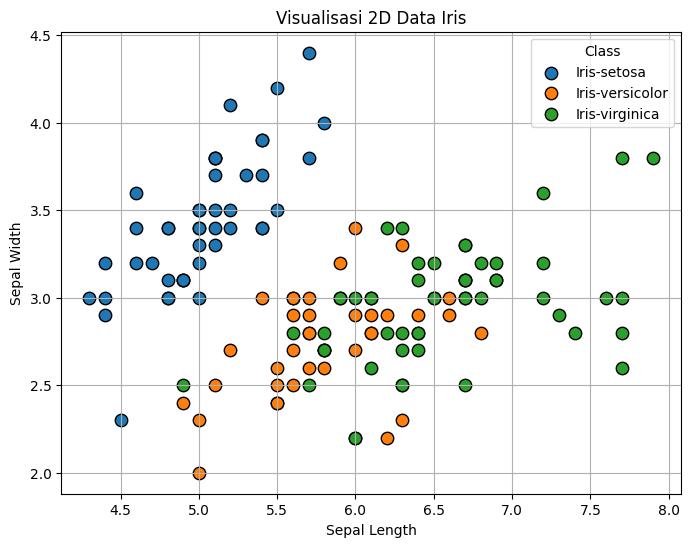

In [ ]:
# Ubah kolom 'class' menjadi kategori jika belum
df_filtered['class'] = df_filtered['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_filtered['class'].cat.categories:
    subset = df_filtered[df_filtered['class'] == label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()

Dibawah ini adalah visualisasi tiga dimensi dari data Iris tanpa memakai PCA

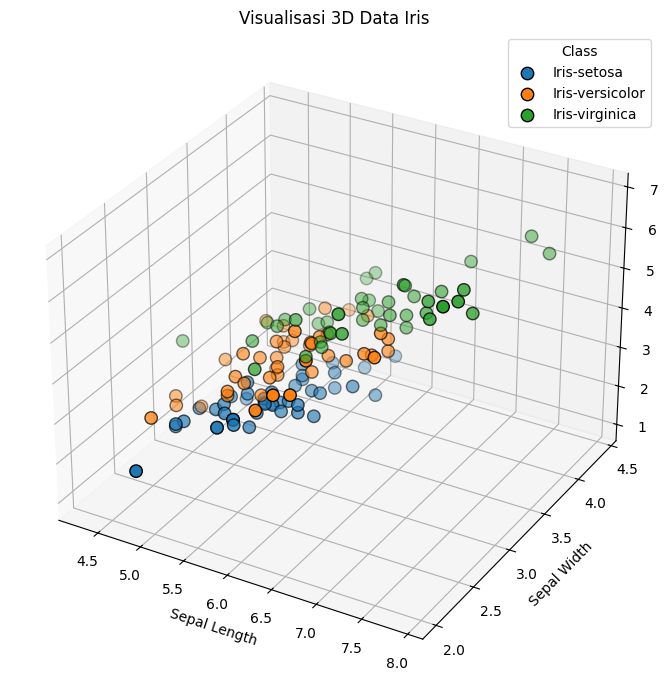

In [ ]:
df_filtered['class'] = df_filtered['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_filtered['class'].cat.categories:
    subset = df_filtered[df_filtered['class'] == label]
    ax.scatter(
        subset['sepal_length'],
        subset['sepal_width'],
        subset['petal_length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

## Visualisasi data asli tanpa outlier menggunakan PCA

Dengan menggunakan Principal Component Analysis (PCA), data Iris divisualisasikan dalam dua dimensi untuk memudahkan analisis dan interpretasi

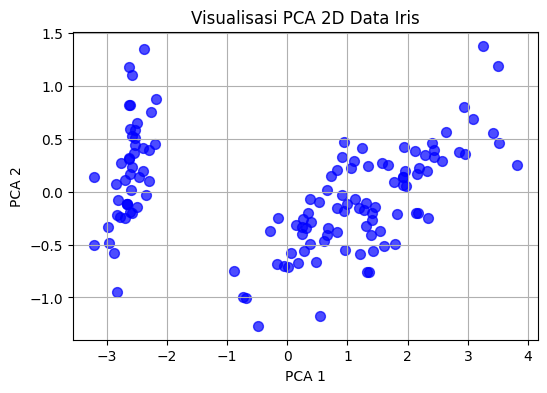

In [ ]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_filtered.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Visualisasi data Iris ini ditampilkan dalam bentuk tiga dimensi setelah dilakukan reduksi dimensi menggunakan metode Principal Component Analysis (PCA)

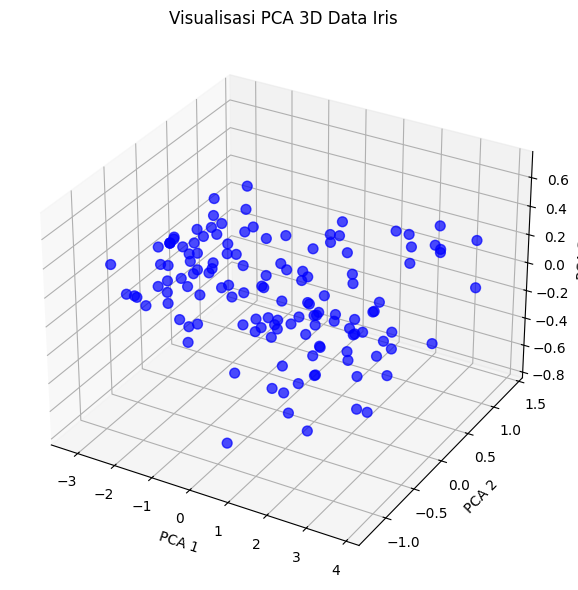

In [ ]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_filtered.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()

## Preprocessing dan Reduksi Dimensi

### Standarisasi dengan menggunakan MinMaxScaler


Pada tahap ini, saya melakukan normalisasi data menggunakan metode MinMaxScaler dengan tujuan untuk menyamakan skala dari seluruh fitur yang ada dalam dataset. Proses ini sangat krusial karena setiap fitur dalam data memiliki rentang nilai yang berbeda-beda, dan perbedaan tersebut dapat memengaruhi hasil pelatihan model machine learning. Hal ini terutama penting untuk algoritma yang mengandalkan perhitungan jarak antar data, seperti K-Nearest Neighbors (KNN) atau Support Vector Machine (SVM), yang sangat sensitif terhadap perbedaan skala fitur.

MinMaxScaler bekerja dengan mentransformasikan setiap nilai dalam sebuah fitur ke dalam rentang nilai antara 0 hingga 1. Transformasi ini dilakukan berdasarkan nilai minimum dan maksimum dari fitur tersebut, sehingga seluruh nilai fitur disesuaikan ke dalam rentang yang sama. Dengan penerapan skala yang seragam ini, model dapat memperlakukan setiap fitur secara seimbang tanpa memberikan bobot berlebih pada fitur yang memiliki nilai asli lebih besar.

Setelah proses normalisasi selesai, saya mengamati adanya peningkatan kestabilan pada performa model yang saya gunakan. Model menjadi lebih konsisten dan hasil prediksinya cenderung lebih akurat dibandingkan sebelum normalisasi diterapkan. Dari sini saya belajar bahwa normalisasi bukan sekadar langkah teknis yang wajib dilakukan, melainkan bagian penting dalam menjaga kualitas data. Dengan data yang sudah dinormalisasi, proses pembelajaran mesin dapat berjalan lebih optimal dan menghasilkan model yang lebih andal.


In [ ]:
# Drop kolom non-numerik
features = df_filtered.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


Berikut ini adalah data yang telah melalui proses standarisasi menggunakan MinMaxScaler untuk menyamakan skala setiap fitur

In [ ]:
print (scaled_features);

[[0.11864407 0.125      0.30555556 0.79166667]
 [0.06779661 0.08333333 0.08333333 0.58333333]
 [0.08474576 0.04166667 0.19444444 0.58333333]
 [0.06779661 0.04166667 0.02777778 0.375     ]
 [0.08474576 0.         0.16666667 0.45833333]
 [0.08474576 0.04166667 0.30555556 0.70833333]
 [0.10169492 0.04166667 0.13888889 0.58333333]
 [0.06779661 0.         0.13888889 0.41666667]
 [0.01694915 0.         0.         0.41666667]
 [0.03389831 0.04166667 0.41666667 0.83333333]
 [0.08474576 0.125      0.38888889 1.        ]
 [0.05084746 0.125      0.30555556 0.79166667]
 [0.06779661 0.08333333 0.22222222 0.625     ]
 [0.11864407 0.08333333 0.38888889 0.75      ]
 [0.08474576 0.08333333 0.22222222 0.75      ]
 [0.11864407 0.04166667 0.30555556 0.58333333]
 [0.08474576 0.125      0.22222222 0.70833333]
 [0.         0.04166667 0.08333333 0.66666667]
 [0.11864407 0.16666667 0.22222222 0.54166667]
 [0.15254237 0.04166667 0.13888889 0.58333333]
 [0.10169492 0.04166667 0.19444444 0.41666667]
 [0.10169492 

## Clustering menggunakan Fuzzy C-Means

### Clustering dengan 2 cluster dan Visualisasi data

Di sini saya menerapkan clustering menggunakan algoritma Fuzzy C-Means dengan jumlah cluster sebanyak dua. Selain itu, saya juga menghitung pusat cluster dan nilai fungsi objektif pada setiap iterasi proses clustering. Setelah itu, saya melakukan visualisasi data Iris dalam dua dimensi untuk melihat hasil clustering tersebut

[Fuzzy C-Means - 2 Clusters]
Silhouette Score: 0.6114
Fuzzy Partition Coefficient (FPC): 0.8549
Objective Function Value (Jm): 9.3921
Cluster Centers (in scaled feature space):
[[0.10371777 0.08485182 0.20766348 0.57424205]
 [0.67598106 0.67409761 0.56054632 0.37391529]]
Objective Function Values per Iteration:
Iterasi 01: 22.3241
Iterasi 02: 18.4470
Iterasi 03: 18.2875
Iterasi 04: 17.1462
Iterasi 05: 12.7475
Iterasi 06: 9.5732
Iterasi 07: 9.3940
Iterasi 08: 9.3921


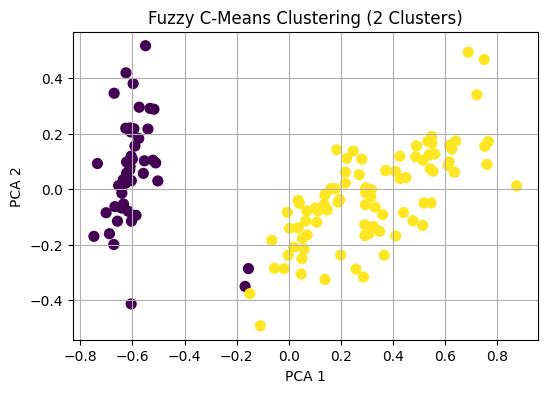

In [ ]:

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_2 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_2)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 2 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut ini saya juga menyajikan visualisasi data Iris dalam bentuk tiga dimensi setelah proses clustering dilakukan

[Fuzzy C-Means - 2 Clusters]
Silhouette Score: 0.6114
Fuzzy Partition Coefficient (FPC): 0.8549
Objective Function Value (Jm): 9.3921
Cluster Centers (in scaled feature space):
[[0.10371777 0.08485182 0.20766348 0.57424205]
 [0.67598106 0.67409761 0.56054632 0.37391529]]
Objective Function Values per Iteration:
Iterasi 01: 22.3241
Iterasi 02: 18.4470
Iterasi 03: 18.2875
Iterasi 04: 17.1462
Iterasi 05: 12.7475
Iterasi 06: 9.5732
Iterasi 07: 9.3940
Iterasi 08: 9.3921


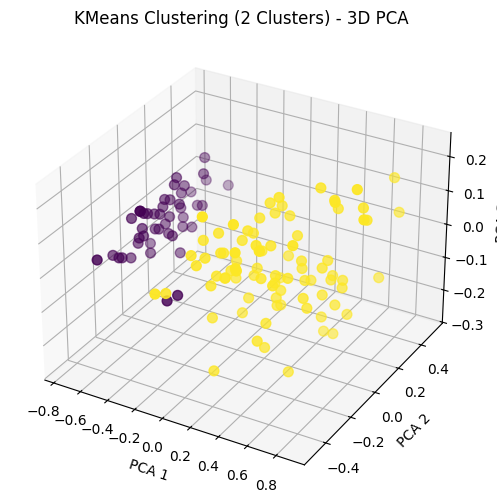

In [ ]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_2 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_2)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 2 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 3 cluster dan Visualisasi data

Di sini saya melaksanakan clustering menggunakan metode Fuzzy C-Means dengan tiga cluster. Selain itu, saya juga menghitung pusat cluster serta fungsi objektif di setiap iterasi selama proses clustering berlangsung. Setelah itu, saya menampilkan visualisasi data Iris dalam dua dimensi untuk menggambarkan hasil clustering tersebut

[Fuzzy C-Means - 3 Clusters]
Silhouette Score: 0.4990
Fuzzy Partition Coefficient (FPC): 0.7456
Objective Function Value (Jm): 4.8116
Cluster Centers (in scaled feature space):
[[0.7757692  0.81427637 0.68382881 0.44179274]
 [0.56307639 0.52451707 0.42942894 0.30709245]
 [0.08448437 0.06539565 0.20064169 0.59193648]]
Objective Function Values per Iteration:
Iterasi 01: 16.0138
Iterasi 02: 12.0648
Iterasi 03: 10.4631
Iterasi 04: 6.4440
Iterasi 05: 5.6636
Iterasi 06: 5.3611
Iterasi 07: 4.9840
Iterasi 08: 4.8380
Iterasi 09: 4.8146
Iterasi 10: 4.8119
Iterasi 11: 4.8117
Iterasi 12: 4.8116


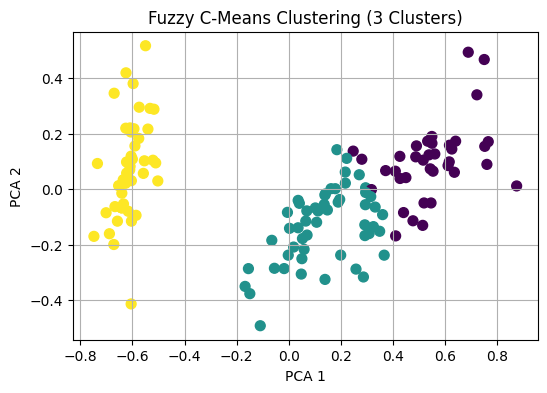

In [ ]:
# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_3 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_3)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 3 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Selain itu, saya juga membuat visualisasi tiga dimensi dari data Iris setelah proses clustering selesai dilakukan

[Fuzzy C-Means - 3 Clusters]
Silhouette Score: 0.4990
Fuzzy Partition Coefficient (FPC): 0.7456
Objective Function Value (Jm): 4.8116
Cluster Centers (in scaled feature space):
[[0.7757692  0.81427637 0.68382881 0.44179274]
 [0.56307639 0.52451707 0.42942894 0.30709245]
 [0.08448437 0.06539565 0.20064169 0.59193648]]
Objective Function Values per Iteration:
Iterasi 01: 16.0138
Iterasi 02: 12.0648
Iterasi 03: 10.4631
Iterasi 04: 6.4440
Iterasi 05: 5.6636
Iterasi 06: 5.3611
Iterasi 07: 4.9840
Iterasi 08: 4.8380
Iterasi 09: 4.8146
Iterasi 10: 4.8119
Iterasi 11: 4.8117
Iterasi 12: 4.8116


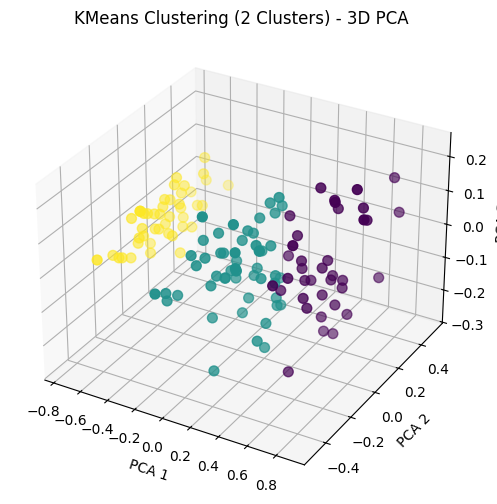

In [ ]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_3 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_3)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 3 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 4 cluster dan Visualisasi data

Di sini saya melakukan clustering menggunakan algoritma Fuzzy C-Means dengan jumlah cluster sebanyak empat. Proses ini juga mencakup perhitungan pusat cluster serta evaluasi fungsi objektif pada setiap iterasi. Setelah clustering selesai, saya membuat visualisasi data Iris dalam bentuk dua dimensi untuk melihat hasilnya

[Fuzzy C-Means - 4 Clusters]
Silhouette Score: 0.4324
Fuzzy Partition Coefficient (FPC): 0.6513
Objective Function Value (Jm): 3.4924
Cluster Centers (in scaled feature space):
[[0.5091123  0.46718023 0.36956311 0.26765046]
 [0.80139352 0.85396282 0.72485787 0.46663731]
 [0.08236572 0.06284074 0.19998122 0.59435124]
 [0.65594576 0.64432497 0.53117867 0.36525142]]
Objective Function Values per Iteration:
Iterasi 01: 12.2762
Iterasi 02: 9.1487
Iterasi 03: 8.5627
Iterasi 04: 6.0569
Iterasi 05: 4.1693
Iterasi 06: 3.7989
Iterasi 07: 3.6139
Iterasi 08: 3.5346
Iterasi 09: 3.5058
Iterasi 10: 3.4967
Iterasi 11: 3.4939
Iterasi 12: 3.4929
Iterasi 13: 3.4926
Iterasi 14: 3.4925
Iterasi 15: 3.4924
Iterasi 16: 3.4924
Iterasi 17: 3.4924
Iterasi 18: 3.4924
Iterasi 19: 3.4924
Iterasi 20: 3.4924


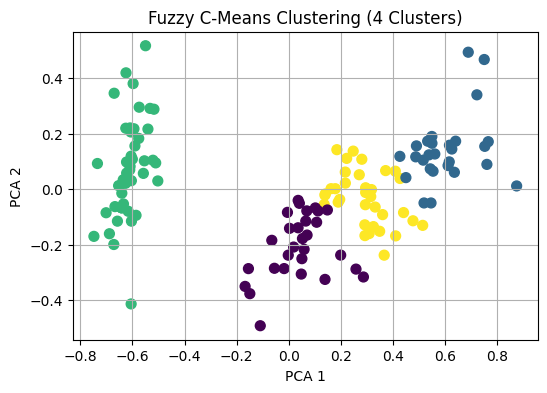

In [ ]:
# Transpose fitur agar sesuai dengan input skfuzzy (fitur x sample)
data = scaled_features.T

# Fuzzy C-Means clustering
n_clusters = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_4 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_4)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 4 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")


# Visualisasi hasil clustering (dalam ruang PCA)
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Selain itu, saya juga melakukan visualisasi data Iris dalam bentuk tiga dimensi setelah proses clustering selesai

[Fuzzy C-Means - 4 Clusters]
Silhouette Score: 0.4324
Fuzzy Partition Coefficient (FPC): 0.6513
Objective Function Value (Jm): 3.4924
Cluster Centers (in scaled feature space):
[[0.5091123  0.46718023 0.36956311 0.26765046]
 [0.80139352 0.85396282 0.72485787 0.46663731]
 [0.08236572 0.06284074 0.19998122 0.59435124]
 [0.65594576 0.64432497 0.53117867 0.36525142]]
Objective Function Values per Iteration:
Iterasi 01: 12.2762
Iterasi 02: 9.1487
Iterasi 03: 8.5627
Iterasi 04: 6.0569
Iterasi 05: 4.1693
Iterasi 06: 3.7989
Iterasi 07: 3.6139
Iterasi 08: 3.5346
Iterasi 09: 3.5058
Iterasi 10: 3.4967
Iterasi 11: 3.4939
Iterasi 12: 3.4929
Iterasi 13: 3.4926
Iterasi 14: 3.4925
Iterasi 15: 3.4924
Iterasi 16: 3.4924
Iterasi 17: 3.4924
Iterasi 18: 3.4924
Iterasi 19: 3.4924
Iterasi 20: 3.4924


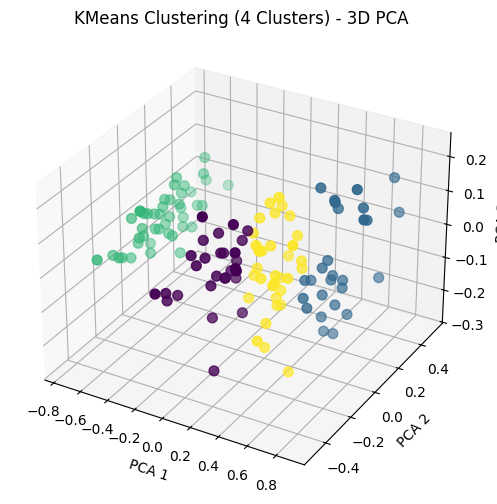

In [ ]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Fuzzy C-Means clustering
n_clusters = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# Ambil label keras dari keanggotaan tertinggi
labels_4 = np.argmax(u, axis=0)

# Evaluasi clustering
silhouette_fuzzy = silhouette_score(scaled_features, labels_4)

# Cetak hasil evaluasi
print(f"[Fuzzy C-Means - 4 Clusters]")
print(f"Silhouette Score: {silhouette_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"Objective Function Value (Jm): {jm[-1]:.4f}")  # ambil nilai terakhir iterasi
print(f"Cluster Centers (in scaled feature space):\n{cntr}")

# Menampilkan nilai fungsi objektif di setiap iterasi
print("Objective Function Values per Iteration:")
for i, val in enumerate(jm):
    print(f"Iterasi {i+1:02d}: {val:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
